In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\train\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Select the features for prediction
features = ['open_x', 'MA_14_open', 'MA_30_open', 'MA_14_close',
            'price_diff_close_open', 'price_diff_high_low', 
            'volume_ratio', 'lag_1_close', 'lag_7_close', 
            'lag_14_close', 'score']

X = data[features]
y = data['close_x']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")


Training samples: 388, Test samples: 98


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Transform features into polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - MSE: {mse}, MAE: {mae}, R²: {r2}")


Polynomial Regression - MSE: 6.605942779927339e-32, MAE: 1.9320925245190663e-16, R²: 1.0


In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Predict and evaluate
y_pred_lstm = model.predict(X_test_lstm)

# Calculate metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"LSTM - MSE: {mse_lstm}, MAE: {mae_lstm}, R²: {r2_lstm}")


C:\Users\gsanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0021 - val_loss: 3.2269e-04
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1869e-04 - val_loss: 1.9685e-04
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8645e-04 - val_loss: 1.7629e-04
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3370e-04 - val_loss: 2.0812e-04
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6320e-04 - val_loss: 1.7220e-04
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6683e-05 - val_loss: 1.4534e-04
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1594e-05 - val_loss: 1.2334e-04
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6136e-05 - val_loss: 1.0495e-04
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7278e-05 - val_loss: 8.8769e-05
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3785e-05 - val_loss: 9.8677e-05
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0786e-05 - val_loss: 

In [5]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}")

# Evaluate Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}")


Random Forest - MSE: 2.079760221214289e-05, MAE: 0.003008186734693883, R²: 0.9364404081918776
Gradient Boosting - MSE: 1.1796596074200012e-05, MAE: 0.0021311788596844695, R²: 0.9639484002264607


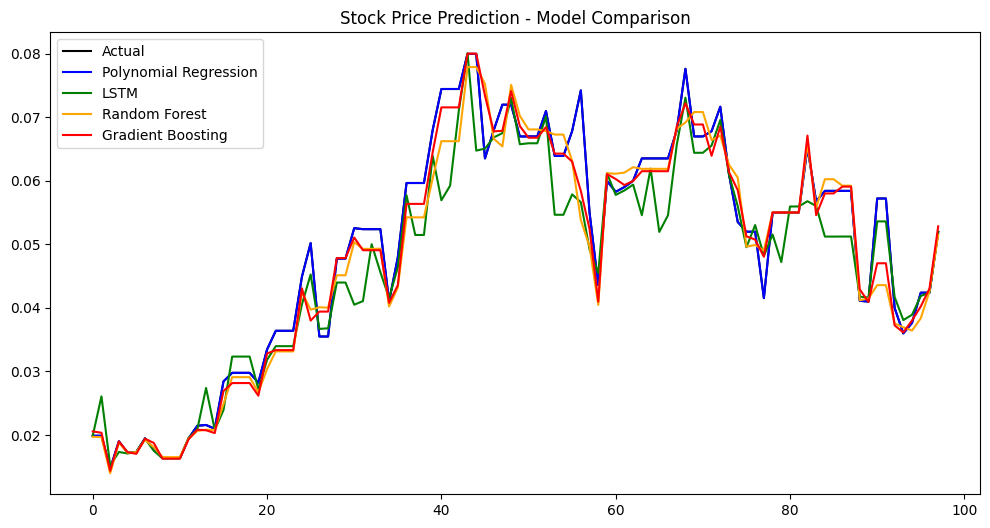

In [6]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values for all models
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_poly, label='Polynomial Regression', color='blue')
plt.plot(y_pred_lstm, label='LSTM', color='green')
plt.plot(y_pred_rf, label='Random Forest', color='orange')
plt.plot(y_pred_gb, label='Gradient Boosting', color='red')

plt.legend()
plt.title('Stock Price Prediction - Model Comparison')
plt.show()


In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert predictions to binary (1 = Increase, 0 = Decrease)
y_test_class = (y_test.values[1:] > y_test.values[:-1]).astype(int)  # True labels
y_pred_class = (y_pred_lstm[1:] > y_pred_lstm[:-1]).astype(int)  # LSTM predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Confusion Matrix:
[[43 15]
 [ 5 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        58
           1       0.69      0.87      0.77        39

    accuracy                           0.79        97
   macro avg       0.79      0.81      0.79        97
weighted avg       0.81      0.79      0.80        97

